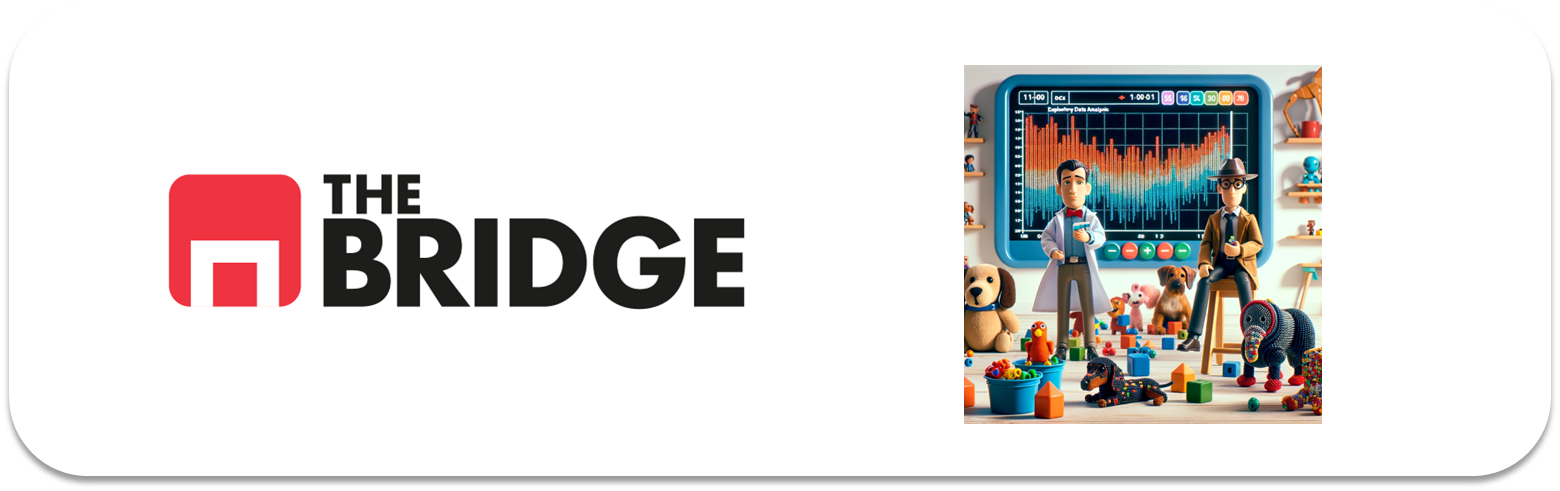

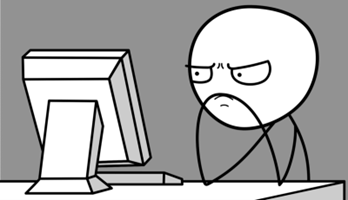

Para ejercitarte y afianzar lo aprendido sobre el estudio estadístico de las relaciones entre variables, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship
from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
df_admision = pd.read_csv("./data/admission_data.csv")

In [3]:
df_admision

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected
...,...,...,...,...,...
12758,12758,1973,Other,M,Accepted
12759,12759,1973,Department of Mechanical Engineering,M,Accepted
12760,12760,1973,Other,F,Rejected
12761,12761,1973,Other,M,Rejected


*Recordamos que tanto "Unnamed: 0" como "Year" no aportaban nada*

In [4]:
df_admision.drop(["Unnamed: 0","Year"], axis = 1, inplace = True)

### Ejercicio 2

Si recuerdas, las variables "Admission" y "Major" parecían tener una relación clara (la distribución de ratio de admisión variaba claramente entre departamentos o "Majors"). Utiliza el estadístico adecuado (para variables categóricas entre sí, Chi-2) para comprobar que esa hipótesis de relación es estadísticamente significativa, tal y como lo hemos hecho en el workout

In [5]:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df_admision['Admission'], df_admision['Major'])

tabla_contingencia

Major,Department of Economics,Department of Mechanical Engineering,Department of Physics and Astronomy,Department of Psychology,Other,School of Medicine,School of Political Science and International Relations
Admission,,,,,,,
Accepted,370,269,914,47,3164,321,147
Rejected,215,523,332,667,4760,597,437


In [6]:
#2 Aplicamos la prueba utilizando las herramientas de scipy.stats



chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1102.860844398216
P-Value: 5.0157639171790306e-235
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[ 239.81195644  324.66849487  510.77897046  292.69356734 3248.32468855
   376.32030087  239.40202147]
 [ 345.18804356  467.33150513  735.22102954  421.30643266 4675.67531145
   541.67969913  344.59797853]]


In [7]:
#3 Analizamos el p-valor (p-value)


*El p-value es claramente bajísimo y nos dice que podemos rechazar la hipótesis nula de independencia con un alto grado de confianza, y reafirmar que hay una relación entre las variables, es decir que no es lo mismo intentar entrar en un departamento o en otro en términos de aceptación*

### Ejercicio 3

Repite el ejercicio anterior para las variables "Admission" y "Gender".

*Vuelven a ser dos categóricas, empleamos de nuevo el test Chi-2*

In [8]:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df_admision['Admission'], df_admision['Gender'])

tabla_contingencia

Gender,F,M
Admission,,
Accepted,1494,3738
Rejected,2827,4704


In [9]:
#2 Aplicamos la prueba utilizando las herramientas de scipy.stats
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 110.84892145390278
P-Value: 6.385628329926473e-26
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[1771.32899788 3460.67100212]
 [2549.67100212 4981.32899788]]


In [10]:
#3 Analizamos

*De nuevo el p-value tan bajo nos reafirma que no es lo mismo el nivel de aceptación entre hombres y mujeres y esta diferencia es estadisticamente muy significativa. Visto este resultado podríamos pensar que existe discriminación, considerando el conjunto de la universidad, que es el objetivo del análisis*

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [11]:
df_tips = pd.read_csv("./data/tips.csv")

In [12]:
df_tips.drop("Unnamed: 0", axis = 1, inplace = True)

In [13]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Ejercicio 5

Comprueba si la hipótesis "No existe una relación entre la propina dejada y el sexo del cliente" tiene confirmación estadística significativa. Para ello emplea el test que creas conveniente a la relación entre las variables "tip" y "sex"(recuerda que aquí disponemos de tres test: t-student, prueba U de Mann-Whitney u el análisis ANOVA).

#0 Selección de test

Dado que la variable categórica es binaria ("sex") deberíamos emplear t-student o prueba U. La prueba de t-student la deberíamos hacer si las distribuciones por valores de la binaria tienen pinta de campana de Gauss. Comprobémoslo:

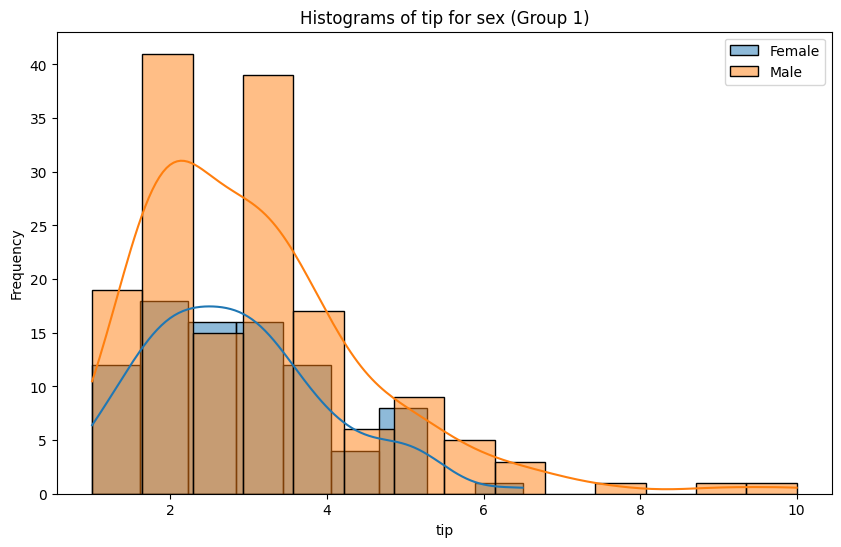

In [14]:
plot_grouped_histograms(df_tips,"sex","tip", 2)

*No tienen pinta de gaussianas y por tanto me decanto por la prueba U*

*Recuerda la pinta de una distribución gaussiana*

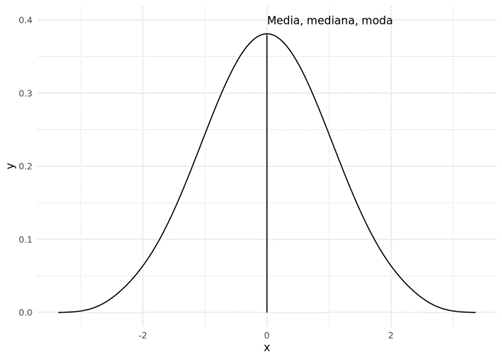

In [15]:
#1 Separar los datos en dos grupos según la variable categórica
grupo_a = df_tips.loc[df_tips.sex == "Female"]["tip"]
grupo_b = df_tips.loc[df_tips.sex == "Male"]["tip"]

In [16]:
#2 Aplicar la prueba y mostrar el resultado

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 6369.5
Valor p: 0.38335449359363927


*Contrariamente a lo que visualmente parecía, estadísticamente no podemos decir que haya una diferencia significativa entre la propina que dan los hombres y las mujeres (p >> 0.05) siempre que queramos extrapolar los datos fuera de nuestra muestra. Para los datos que tenemos hay una diferencia (en tendencia y dispersión) pero si pensaramos en otros clientes del mismo local o en otras épocas del mismo local no podríamos extrapolar esa diferencia. De hecho, deberíamos tender a pensar que la propina es la misma independientemmente del sexo del *"propinante"**

### Ejercicio 6

Repite el ejercicio anterior para "tip" y "size" considerando esta última como "categórica". Haz el analisis bivariante visual previo.

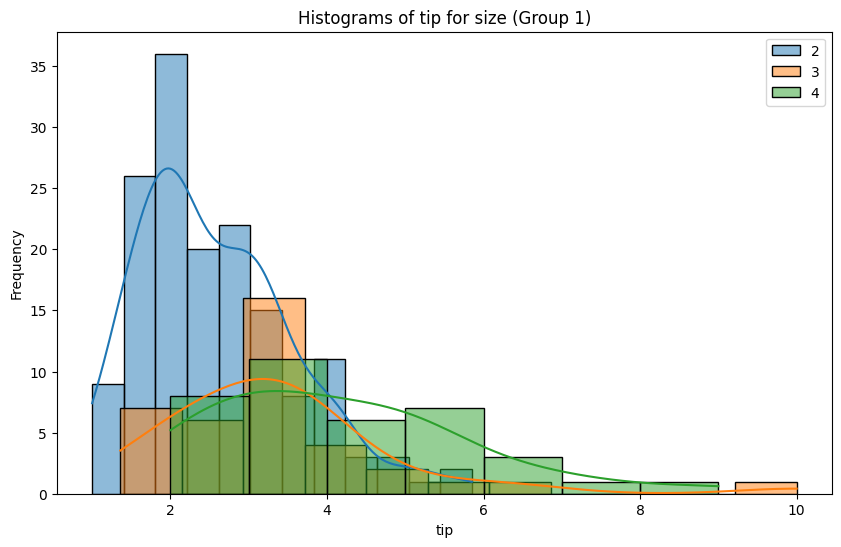

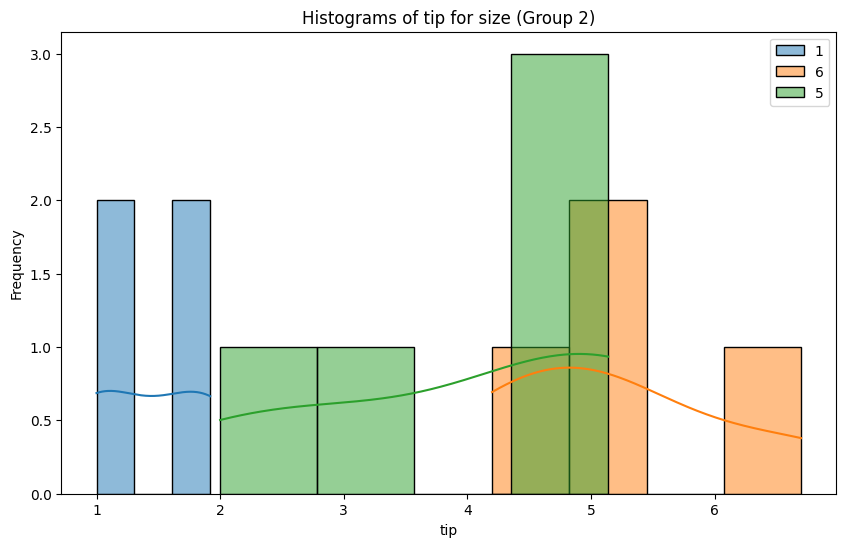

In [17]:
# Analisis visual: Distribuciones y diagramas de cajas


plot_grouped_histograms(df_tips, "size","tip", group_size= 3)

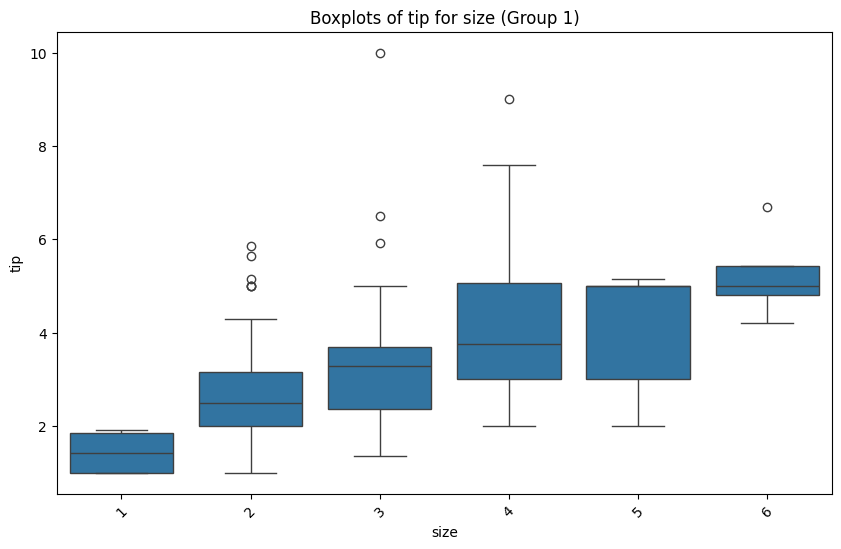

In [20]:
# Diagramas de caja comparados
plot_grouped_boxplots(df_tips.sort_values("size"),"size", "tip", 6)

*La comparación de diagramas de caja invia a pensar que cuando más grande el grupo más propina y casi que hay una relación lineal, y eso me invita a que después del análisis como numérica-categórica le haga una análisis de correlación*

#0. Elección del estadístico
Se trata de una categorica no binaria. Si analizamos las frecuencias de "size":

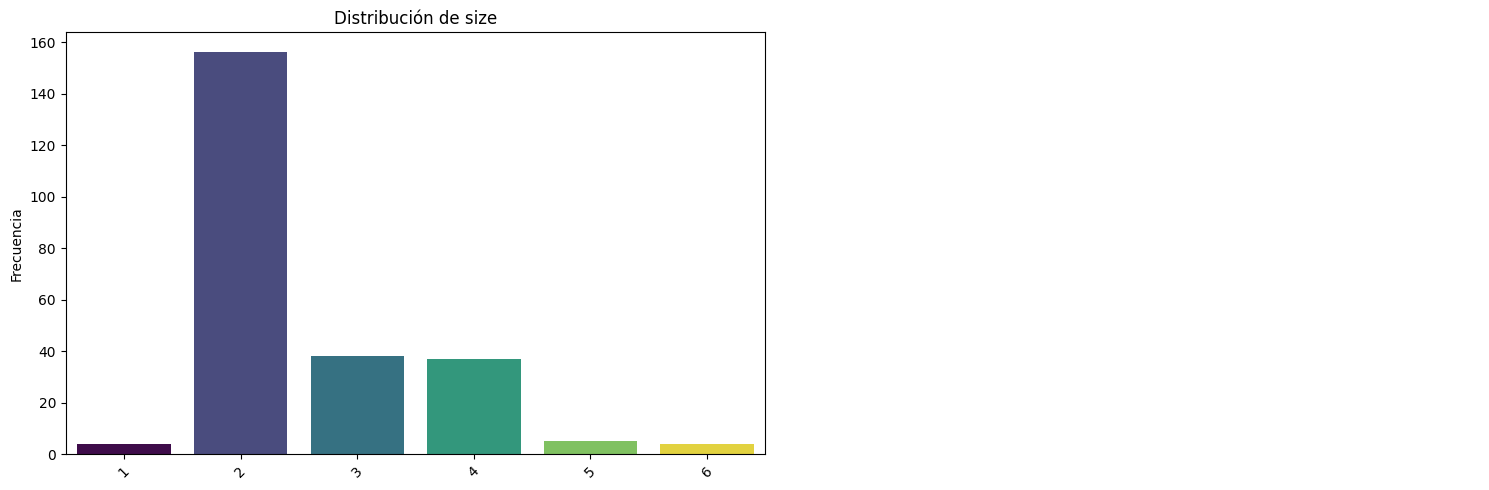

In [37]:
pinta_distribucion_categoricas(df_tips, ["size"])

*Entonces nos decantamos por el análisis de varianza o Anova*

In [22]:
#1 Separar en grupos según los valores de las categorías

grupos = df_tips['size'].unique()  # Obtener los valores únicos de la columna categórica
tips_por_tam = [df_tips[df_tips['size'] == grupo]['tip'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
tips_por_tam

[0      1.01
 3      3.31
 6      2.00
 8      1.96
 9      3.23
        ... 
 237    1.17
 240    2.00
 241    2.00
 242    1.75
 243    3.00
 Name: tip, Length: 156, dtype: float64,
 1       1.66
 2       3.50
 16      1.67
 17      3.71
 18      3.50
 19      3.35
 35      3.60
 36      2.00
 37      3.07
 38      2.31
 39      5.00
 40      2.24
 48      2.05
 64      2.64
 65      3.15
 71      3.00
 102     2.50
 112     4.00
 114     4.00
 129     2.18
 146     1.36
 152     2.74
 162     2.00
 165     3.48
 170    10.00
 182     3.50
 186     3.50
 188     3.50
 189     4.00
 200     4.00
 205     3.23
 206     3.41
 210     2.00
 214     6.50
 223     3.00
 231     3.00
 238     4.67
 239     5.92
 Name: tip, dtype: float64,
 4      3.61
 5      4.71
 7      3.12
 11     5.00
 13     3.00
 23     7.58
 25     2.34
 31     2.50
 33     2.45
 44     5.60
 47     6.00
 52     5.20
 54     4.34
 56     3.00
 59     6.73
 63     3.76
 77     4.00
 85     5.17
 95     4.73
 116    5

In [27]:
#2 Aplicar el estadístico
f_val, p_val = f_oneway(*tips_por_tam) # El operador * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 15.746330672727057
Valor p: 2.1694633916208874e-13


#3 Interpretar el resultado

*El p-value obtenido nos dice que rechacemos la hipótesis nula o directora de indepedencia y que existe una relación estadísticamente significativa extrapolable entre propinas y el tamaño del grupo. Una positiva*

### Ejercicio 7

Considera ahora "size" como numérica, muestra el diagrama de dispersión con correlación entre "size" y "tip" y luego aplicales el test para saber si el coeficiente de pearson es estadísticamente significativo. ¿Qué más observas?

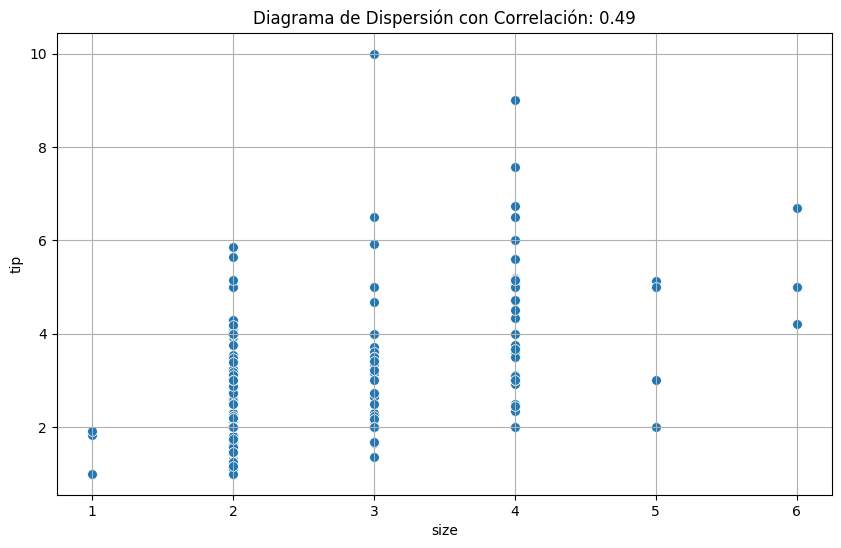

In [31]:
grafico_dispersion_con_correlacion(df_tips,"size","tip", mostrar_correlacion = True)

*Según el gráfico de dispersión y el coeficiente de Pearson, podríamos decir que existe una ligera relación lineal positiva entre ambas*

In [33]:
#Aplicamos el estadístico

pearsonr(df_tips["size"],df_tips["tip"])

PearsonRResult(statistic=0.4892987752303571, pvalue=4.300543327225138e-16)

*El test nos arroja un p-value <<<<< 0.05 (mucho menor que 0.05) con lo que nos reafirma en la conclusión de que existe esa relación positiva de fuerza media, y que esta es estadísticamente significativa*